In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
def encode(row):
    if row.quality < 4.5:
        return 0
    elif row.quality < 6.5:
        return 1
    else:
        return 2
df["quality"] = df.apply(encode,axis=1)

<AxesSubplot:xlabel='quality', ylabel='count'>

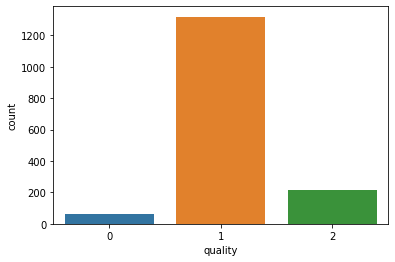

In [7]:
sns.countplot(x = df['quality'])

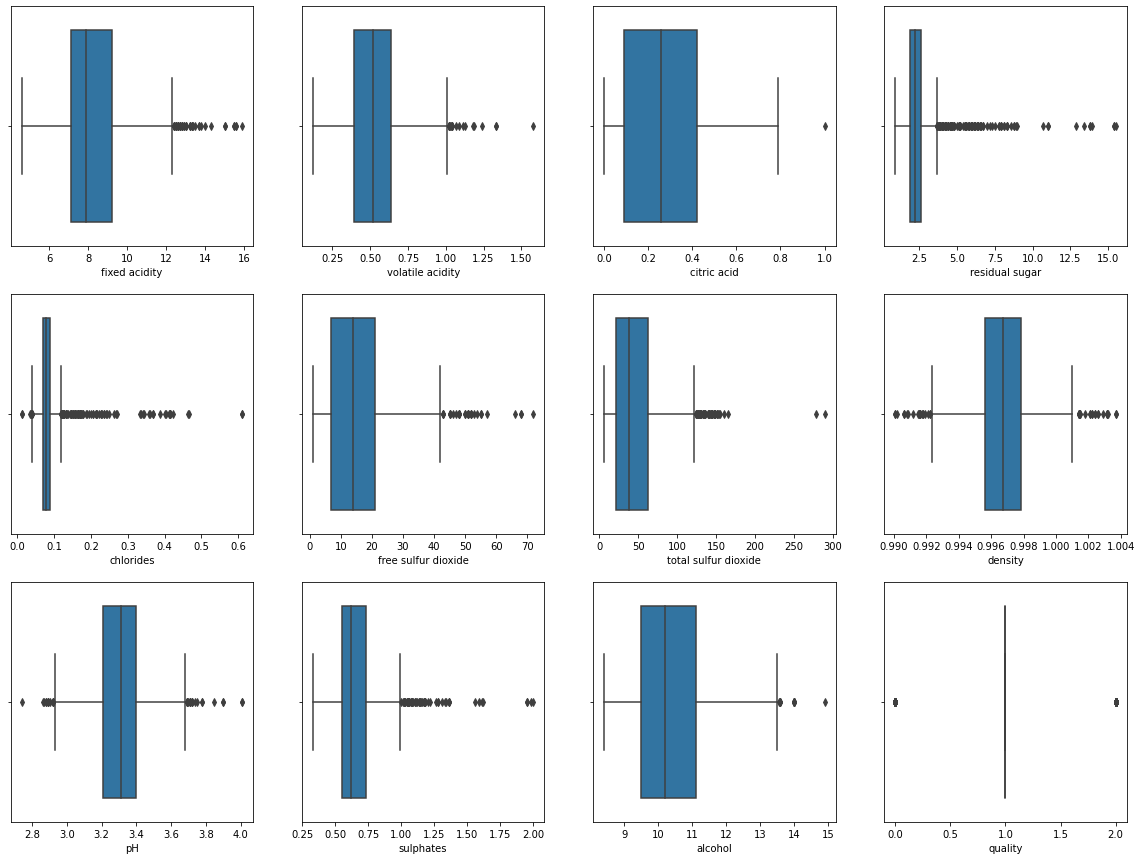

In [34]:
fig = plt.figure(figsize=(20, 15))
# access subplots by row, col, no. starting from 1
j = 1
for i in df.columns:
    plt.subplot(3, 4, j)
    sns.boxplot(x = df[i])
    j += 1

### inference
* residual sugar, chlorides, sulfur, sulphates seem to be heavily right skewed
* citric acid, density have a normal data distribution

In [15]:
q1, median, q3 = np.percentile(df['chlorides'], [25, 50, 75])
min, max = df['chlorides'].min(), df['chlorides'].max()
print(min, max)
print(q1, median, q3)
print("variance ", np.var(df['chlorides']))
print("mean ",np.mean(df['chlorides']))

0.012 0.611
0.07 0.079 0.09
variance  0.0022137573233114347
mean  0.08746654158849279


### chloride data points are right skewed with most values concentrated at 0.09

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

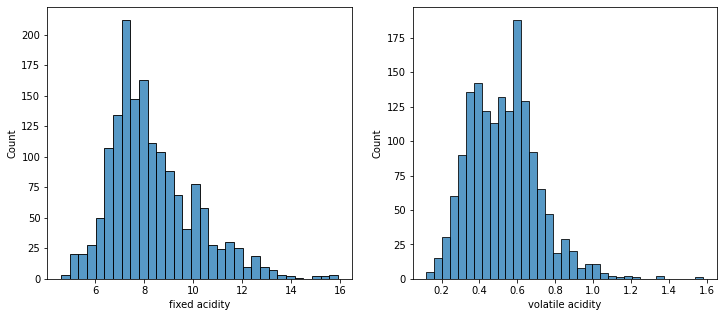

In [40]:
fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(x = df['fixed acidity'])
plt.subplot(122)
sns.histplot(x = df['volatile acidity'])

### probabley after outlier removal by iqr method, the data would be in normal distribution

<AxesSubplot:xlabel='alcohol', ylabel='count'>

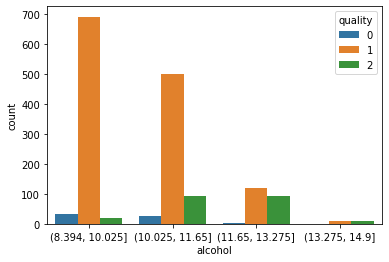

In [51]:
sns.countplot(x = pd.cut(df['alcohol'], bins=4), hue=df['quality'])

<AxesSubplot:xlabel='citric acid', ylabel='count'>

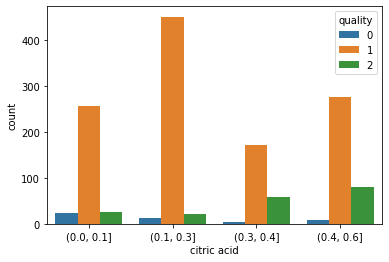

In [5]:
sns.countplot(x = pd.cut(df['citric acid'], bins=[0, 0.1, 0.3, 0.4, 0.6]), hue=df['quality'])

### Inference
* there are more good quality wine where alcohol level is around 10 - 13
* medium quality wine has alcohol level from 8 - 11

<AxesSubplot:>

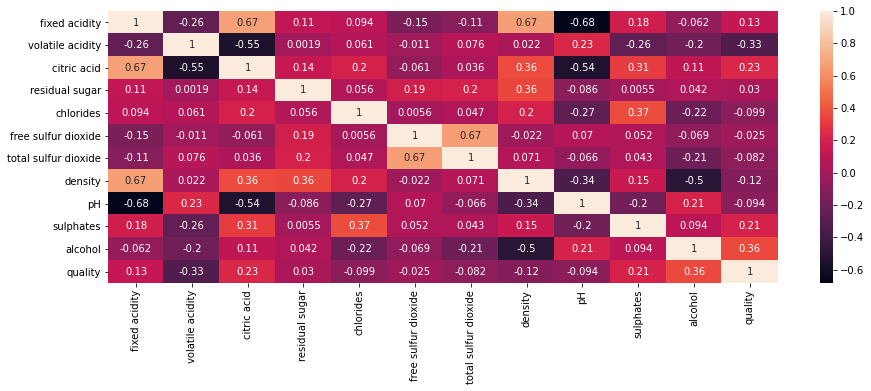

In [12]:
fig, ax = plt.subplots(figsize = (15 ,5))
sns.heatmap(df.corr() , annot = True)

## Inference
* residual sugar has least corr with quality
* sulfur qty also have low correlation with quality

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

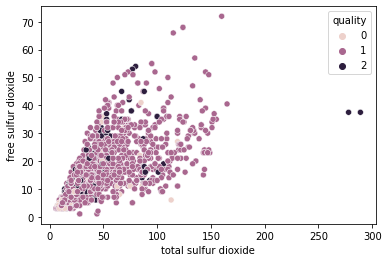

In [15]:
sns.scatterplot(x = df['total sulfur dioxide'], y = df['free sulfur dioxide'], hue = df['quality'])

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

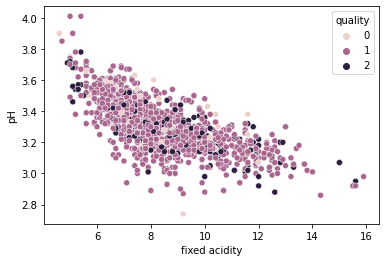

In [11]:
sns.scatterplot(x = df['fixed acidity'], y = df['pH'], hue = df['quality'])

### for tsd less than 100 both values are highly correlated
### pH and fixed acidity are highly correlated over all range of values

### pairs with high corr
*  fixed acidity - pH, fixed acidity - density, fixed acidity - citric acid
* citric acid - pH